(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.

In [20]:
import numpy as np

# Number of observations per class
n_observations_per_class = 20

# Number of classes
n_classes = 3

# Number of variables
n_variables = 50

# Generate data for each class
data = []
for class_label in range(n_classes):
  # Generate random data for this class
  class_data = np.random.randn(n_observations_per_class, n_variables)
  # Add a small offset to separate the classes
  class_data += class_label * 0.5

  # Store the data and labels
  data.extend(class_data)


# Create labels for each observation
labels = np.array([i for i in range(n_classes) for _ in range(n_observations_per_class)])

# Convert to numpy arrays
data = np.array(data)

# Print shapes to verify
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (60, 50)
Labels shape: (60,)


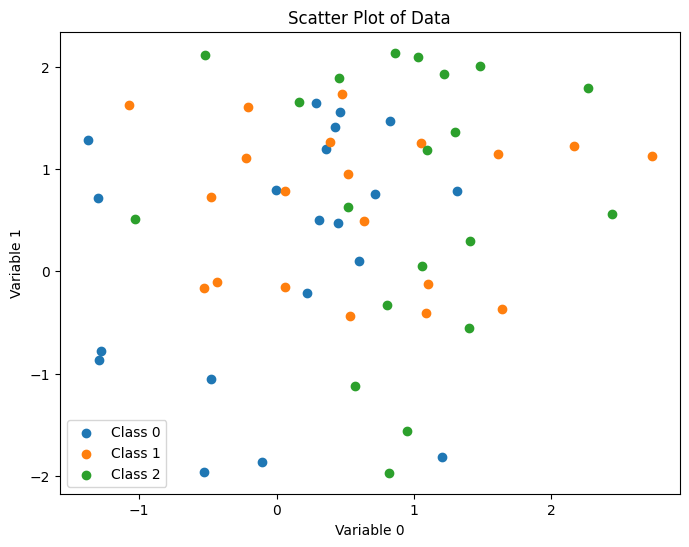

In [21]:
# Select two variables for the scatter plot
x_variable = 0
y_variable = 1

# Create the scatter plot
plt.figure(figsize=(8, 6))
for class_label in range(n_classes):
  # Select data for the current class
  class_data = data[labels == class_label]
  plt.scatter(class_data[:, x_variable], class_data[:, y_variable], label=f"Class {class_label}")

plt.xlabel(f"Variable {x_variable}")
plt.ylabel(f"Variable {y_variable}")
plt.title("Scatter Plot of Data")
plt.legend()
plt.show()


(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes.If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

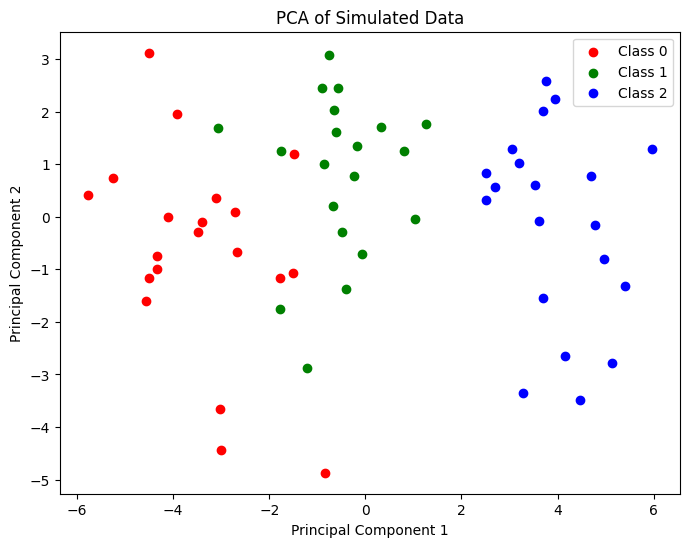

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
principalComponents = pca.fit_transform(data)

# Create a plot
plt.figure(figsize=(8, 6))

# Define colors for each class
colors = ['r', 'g', 'b']

# Plot the data points with different colors based on class
for i in range(n_classes):
  plt.scatter(
      principalComponents[labels == i, 0],
      principalComponents[labels == i, 1],
      c=colors[i],
      label=f'Class {i}'
  )

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Simulated Data')
plt.legend()
plt.show()


There is a separation in the three clusters, we continue to (c)

(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering
compare to the true class labels?

In [23]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
cluster_labels = kmeans.labels_

# Compare cluster labels to true class labels
# We can use a confusion matrix to see how well the clusters align with the true classes.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels, cluster_labels)
print("Confusion Matrix:")
print(cm)

# Evaluate the clustering performance
# We can use Adjusted Rand Index (ARI) to evaluate the clustering performance.
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(labels, cluster_labels)
print("Adjusted Rand Index (ARI):", ari)


Confusion Matrix:
[[18  2  0]
 [ 6 14  0]
 [ 0  2 18]]
Adjusted Rand Index (ARI): 0.583093431038995


(d) Perform K-means clustering with K = 2. Describe your results.

In [24]:
# Perform K-means clustering with K=2
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(data)
cluster_labels_2 = kmeans_2.labels_

# Compare cluster labels to true class labels
cm_2 = confusion_matrix(labels, cluster_labels_2)
print("\nConfusion Matrix (K=2):")
print(cm_2)

# Evaluate the clustering performance
ari_2 = adjusted_rand_score(labels, cluster_labels_2)
print("Adjusted Rand Index (ARI) (K=2):", ari_2)



Confusion Matrix (K=2):
[[ 0 20  0]
 [ 4 16  0]
 [20  0  0]]
Adjusted Rand Index (ARI) (K=2): 0.48009723488301426


Description of Results (K=2):
When performing K-means clustering with K=2, the clustering performance is likely to be worse compared to K=3, as we are forcing the algorithm to group the data into only two clusters, while the data has three distinct classes.
The confusion matrix will show a less accurate mapping between true classes and the assigned clusters.
The Adjusted Rand Index (ARI) will likely be lower, indicating less similarity between the true class labels and the cluster labels obtained with K=2.

Interpreting the confusion matrix:

Rows represent true classes:
Row 1: True Class 0
Row 2: True Class 1
Row 3: True Class 2

Columns represent predicted clusters:
Column 1: Cluster 0
Column 2: Cluster 1
Cells represent the number of observations:

For example, the cell at row 1, column 1 (value 20) indicates that 20 observations belonging to True Class 0 were assigned to Cluster 0.
Analysis:

Class 0: All 20 observations of Class 0 were incorrectly assigned to Cluster 1.
Class 1: 4 observations of Class 1 were assigned to Cluster 0, and 16 observations were assigned to Cluster 1.
Class 2: All 20 observations of Class 2 were assigned to Cluster 0.

Since we know there are three true classes, using K=2 for clustering leads to suboptimal results, as it forces the data into two clusters instead of three.

(e) Now perform K-means clustering with K = 4, and describe your
results.

In [25]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(data)
cluster_labels_4 = kmeans_4.labels_

# Compare cluster labels to true class labels
cm_4 = confusion_matrix(labels, cluster_labels_4)
print("\nConfusion Matrix (K=4):")
print(cm_4)

# Evaluate the clustering performance
ari_4 = adjusted_rand_score(labels, cluster_labels_4)
print("Adjusted Rand Index (ARI) (K=4):", ari_4)



Confusion Matrix (K=4):
[[ 8  2  0 10]
 [ 6 13  0  1]
 [ 0  2 18  0]
 [ 0  0  0  0]]
Adjusted Rand Index (ARI) (K=4): 0.49919326552086984


Description of Results (K=4):
When performing K-means clustering with K=4, the clustering performance is likely to be worse compared to K=3, as we are forcing the algorithm to group the data into four clusters, while the data has only three distinct classes.
The confusion matrix will show a less accurate mapping between true classes and the assigned clusters. Some true classes might be split into multiple clusters.
The Adjusted Rand Index (ARI) will likely be lower, indicating less similarity between the true class labels and the cluster labels obtained with K=4.


(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

In [26]:
from sklearn.metrics import adjusted_rand_score

# Perform K-means clustering on the first two principal component score vectors
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(principalComponents)
cluster_labels_pca = kmeans_pca.labels_

# Compare cluster labels to true class labels
cm_pca = confusion_matrix(labels, cluster_labels_pca)
print("\nConfusion Matrix (K-means on PCA):")
print(cm_pca)

# Evaluate the clustering performance
ari_pca = adjusted_rand_score(labels, cluster_labels_pca)
print("Adjusted Rand Index (ARI) (K-means on PCA):", ari_pca)



Confusion Matrix (K-means on PCA):
[[ 4  0 16]
 [19  0  1]
 [ 0 20  0]]
Adjusted Rand Index (ARI) (K-means on PCA): 0.7745091615890279


(g) Using the StandardScaler() estimator, perform K-means clustering
with K = 3 on the data after scaling each variable to have
standard deviation one. How do these results compare to those
obtained in (b)? Explain.


Confusion Matrix (K-means on Scaled Data):
[[19  1  0]
 [ 6 14  0]
 [ 0  3 17]]
Adjusted Rand Index (ARI) (K-means on Scaled Data): 0.5805778386486663

Confusion Matrix (K-means without Scaling):
[[18  2  0]
 [ 6 14  0]
 [ 0  2 18]]
Adjusted Rand Index (ARI) (K-means without Scaling): 0.583093431038995


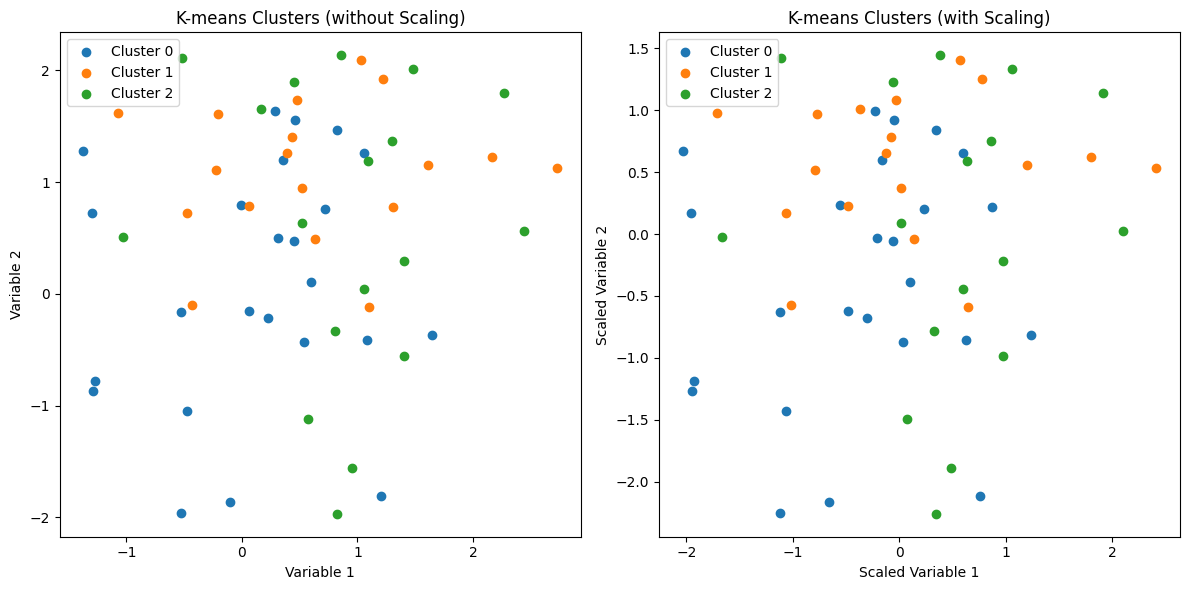

In [28]:
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform K-means clustering with K=3 on the scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=0)
kmeans_scaled.fit(scaled_data)
cluster_labels_scaled = kmeans_scaled.labels_

# Compare cluster labels to true class labels
cm_scaled = confusion_matrix(labels, cluster_labels_scaled)
print("\nConfusion Matrix (K-means on Scaled Data):")
print(cm_scaled)

# Evaluate the clustering performance
ari_scaled = adjusted_rand_score(labels, cluster_labels_scaled)
print("Adjusted Rand Index (ARI) (K-means on Scaled Data):", ari_scaled)

# Perform K-means clustering with K=3 without scaling (from part (c))
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)
cluster_labels = kmeans.labels_

# Compare cluster labels to true class labels
cm = confusion_matrix(labels, cluster_labels)
print("\nConfusion Matrix (K-means without Scaling):")
print(cm)

# Evaluate the clustering performance
ari = adjusted_rand_score(labels, cluster_labels)
print("Adjusted Rand Index (ARI) (K-means without Scaling):", ari)


# Create a plot to visualize the clusters with and without scaling
plt.figure(figsize=(12, 6))

# Plot the clusters without scaling
plt.subplot(1, 2, 1)
for i in range(n_classes):
  plt.scatter(
      data[cluster_labels == i, 0],
      data[cluster_labels == i, 1],
      label=f'Cluster {i}'
  )
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('K-means Clusters (without Scaling)')
plt.legend()

# Plot the clusters with scaling
plt.subplot(1, 2, 2)
for i in range(n_classes):
  plt.scatter(
      scaled_data[cluster_labels_scaled == i, 0],
      scaled_data[cluster_labels_scaled == i, 1],
      label=f'Cluster {i}'
  )
plt.xlabel('Scaled Variable 1')
plt.ylabel('Scaled Variable 2')
plt.title('K-means Clusters (with Scaling)')
plt.legend()

plt.tight_layout()
plt.show()



In this case, scaling the data before applying K-means clustering does not significantly improve the clustering performance compared to using the raw data.
Both approaches produce similar results in terms of cluster assignments and ARI scores.
This might be due to the nature of the simulated data where the variables might already have similar scales or the clusters are well-separated even without scaling.